In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL2Jsb2cvcG9zdHMvMjAyNC8yMDI0LTA1LTAxLXNpZ25hbHM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/home/oren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_508861/3355474698.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1700493245.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1700493245.0, "/usr/lib/python3.10/codecs.py": 1700493245.0, "/usr/lib/python3.10/encodings/aliases.py": 1700493245.0, "/usr/lib/python3.10/encodings/__init__.py": 1700493245.0, "/usr/lib/python3.10/encodings/utf_8.py": 1700493245.0, "/usr/lib/python3.10/abc.py": 1700493245.0, "/usr/lib/python3.10/io.py": 1700493245.0, "/usr/lib/python3.10/stat.py": 1700493245.0, "/usr/lib/python3.10/_collections_abc.py": 1700493245.0, "/usr/lib/python3.10/genericpath.py": 1700493245.0, "/usr/lib/python3.10/posixpath.py": 1700493245.0, "/usr/lib/python3.10/os.py": 1700493245.0, "/usr/lib/python3.10/_sitebuiltins.py": 1700493245.0, "/usr/lib/python3.10/types.py": 1700493245.0, "/usr/lib/python3.10/warnings.py": 1700493245.0, "/usr/lib/python3.10/importlib/__init__.py": 1700493245.0, "/usr/lib/python3.10/importlib/_abc.py": 1700493245.0, "/usr/lib/python3.10/keyword.py": 1700493245.0, "/u

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd

class Urn():
  ''' classic urn model using np array of ball counts
      for two balls this is a model for the  Binomial distribution
      for more balls this is a model of the multinomial distribution
  '''
  def __init__(self, ball_names=['white','black'], init='ones', weights=None):
    '''initialize the urn with ball names and weights'''
    self.ball_names = ball_names
    
    if weights is not None:
      assert type(weights) == np.ndarray, "Weights must be a numpy array."
      assert weights.shape[0] == (len(self.ball_names)), f"Weight shape {weights.shape} not the same as the number of balls. {len(self.ball_names)}"
      self.weights = weights
    else:
      if init == 'ones':
        self._weights = np.ones((self.ball_colors))
      elif init == 'zeros':
        self._weights = np.zeros((self.ball_colors))
      elif init == 'random':
        self._weights = np.random.rand(self.ball_colors)
      else:
        raise ValueError("Initialization parameter must be 'ones', 'zeros', or 'random'.")

  @property
  def ball_names(self):
    return self._ball_names
  
  @ball_names.setter
  def ball_names(self, ball_names):
    assert type(ball_names) == list, "Ball names must be a list."
    self._ball_names = ball_names
    self._num_balls = len(ball_names)

  @property
  def ball_colors(self):
    return len(self.ball_names)

  @property
  def weights(self):
    return self._weights
  
  @weights.setter
  def weights(self, weights):
    assert type(weights) == np.ndarray, "Weights must be a numpy array."
    #assert weights.shape == (self.ball_colors), "Weights must have the same shape as the number of balls and columns."
    self._weights = weights

  def draw(self,n=1):
    ''' draw a ball from the urn with replacement'''
    row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=n)
    result = []
    for i in range(n):
      result.append(self.ball_names[row_idx[i]])
    return result

In [3]:
#| label: bernoulli-urn-sampling
#some examples
benulli_urn = Urn()
print(benulli_urn.draw(10))
print(benulli_urn.draw(10))
print(benulli_urn.draw(10))

['black', 'black', 'black', 'white', 'white', 'white', 'white', 'black', 'white', 'white']
['black', 'white', 'black', 'white', 'white', 'white', 'white', 'white', 'white', 'white']
['white', 'white', 'black', 'white', 'black', 'black', 'black', 'white', 'white', 'white']


In [4]:
#| label: bernoulli-urn-weighted

benulli_urn.weights = np.array([1., 9.])
print(benulli_urn.draw(10))

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']


In [5]:
#| label: bernoulli-urn-weighted-sampling
bern_df = pd.DataFrame({'balls': benulli_urn.draw(1000)})
bern_df.head()

,balls
0,black
1,black
2,black
3,black
4,white


In [6]:
#| label: fig-urn-bernoulli
#| fig-cap: Bernoulli urn model

fig=alt.Chart(bern_df).mark_bar().encode(
    x='balls',
    y='count()'
).properties(width=200, height=200)
fig.show()

alt.Chart(...)

In [7]:
multinomial_urn = Urn(ball_names=['red','blue','green'], weights=np.array([3., 9., 1.]))
multi_df = pd.DataFrame({'balls': multinomial_urn.draw(100)})
multi_df.head()

,balls
0,blue
1,green
2,blue
3,blue
4,blue


In [8]:
#| label: fig-urn-multinomial
#| fig-cap: Multinomial urn model
#alt.renderers.enable("html")
alt.Chart(multi_df).mark_bar().encode(
    x='balls',
    y='count()'
).properties(width=200, height=200)

alt.Chart(...)

In [9]:
print(multinomial_urn.draw(10))

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue']


In [10]:
class Polya(Urn):
  ''' Polya urn model'''

  def draw(self,n=1):
    ''' draw a ball from the urn with replacement and add a new ball of the same color'''
    result = []
    for i in range(n):
      row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=n)
      result.append(self.ball_names[row_idx[i]])
      self.weights[row_idx[i]] += 1
    return result

class Hypergeometric(Urn):
  ''' Hypergeometric urn model'''

  def draw(self,n=1):
    ''' draw a ball from the urn without replacement'''
    result = []
    for i in range(n):
      row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=n)
      result.append(self.ball_names[row_idx[i]])
      self.weights[row_idx[i]] -= 1
    return result

class Polya(Urn):
  ''' 
    The polya urn model is a generalization of the urn model where c is the number of balls of the same color added to the urn
    for c=0 the polya urn model we get drawing with replacement reulting in binomial and multinomial distributions.
    for c=1 the polya urn model we get drawing with replacement and adding a new ball of the same color resulting in a  BetaBinomial and Dirichlet distributions.
    for c=-1 the polya urn model we get drawing withot replacement resulting in a  the hypergeometric distribution.
  '''
  
  def init(self,ball_names=['white','black'], init='ones', weights=None, c=1):
    '''initialize the urn with ball names and weights'''
    super().__init__(ball_names, init, weights)
    self.c = c

  def draw(self,n=1):
    ''' draw a ball from the urn with replacement and add a new ball of the same color'''
    result = []
    for i in range(n):
      row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=n)
      result.append(self.ball_names[row_idx[i]])
      self.weights[row_idx[i]] += 1
    return result

class Hoppe(Polya):
  ''' Hoppe urn model'''
  
  def __init__(self,ball_names=['0'], init='ones', weights=None, c=1, mutator_mass=1.0):
    '''initialize the urn with ball names and weights'''
    super().__init__(ball_names, init, weights, c)
    self.mutator_mass = mutator_mass
    if weights is not None:
      assert type(weights) == np.ndarray, "Weights must be a numpy array."
      assert weights.shape[0] == (len(self.ball_names)), f"Weight shape {weights.shape} not the same as the number of balls. {len(self.ball_names)}"
      self.weights = weights
    else:
      if init == 'ones':
        self._weights = np.ones((self.ball_colors))
      elif init == 'zeros':
        self._weights = np.zeros((self.ball_colors))
      elif init == 'random':
        self._weights = np.random.rand(self.ball_colors)
      else:
        raise ValueError("Initialization parameter must be 'ones', 'zeros', or 'random'.")
      #set the weight of the mutator ball to the mutator mass
      self.weights[0] = self.mutator_mass
    
  def draw(self,n=1):
    ''' draw a ball from the urn with replacement and add a new ball of the same color'''
    result = []
    for i in range(n):
      row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=1)
      if row_idx[i] == 0:
        #add a new ball color
        self.ball_names.append(str(len(self.ball_names)))
        self.weights = np.append(self.weights, c)
        result.append(self.ball_names[-1])
      else:
        result.append(self.ball_names[row_idx[0]])
        self.weights[row_idx[i]] += c
        
    return result
  
class Moran(Polya):
  ''' Moran urn model'''
  
  def draw(self,n=1):
    ''' draw a ball from the urn with replacement and add a new ball of the same color'''
    result = []
    for i in range(n):
      row_idx = np.random.choice(self.ball_colors, p=self.weights/self.weights.sum(), size=2)
      self.weights[row_idx[0]] += c
      self.weights[row_idx[1]] -= c
      
      result.append(self.ball_names[row_idx[0]])
        
    return result

Initial weights:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Weight for state0 and signal 'a': 1.0
Weights after setting weight for state0 and signal 'a' to 0.5:
[[2. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Conditional probabilities:
[[0.4  0.2  0.2  0.2 ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Conditional probability of signal a given state0: 0.4
Conditional probability of signal a given state1: 0.25
Chosen signal for state0: a
Weights after updating weight for state0 and signal 'a' with a reward of 0.1:
[[3. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


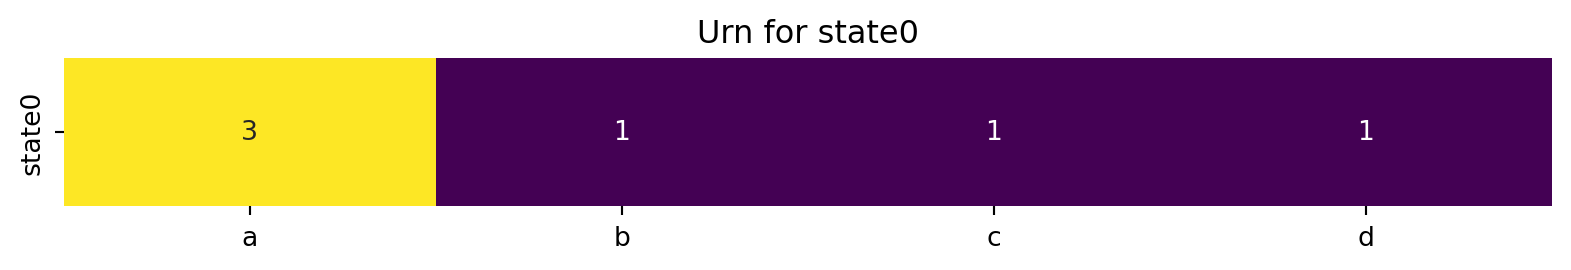

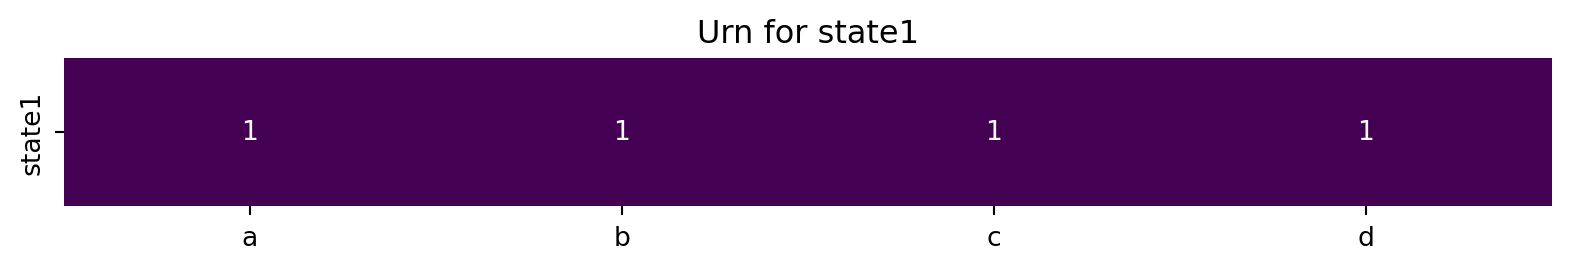

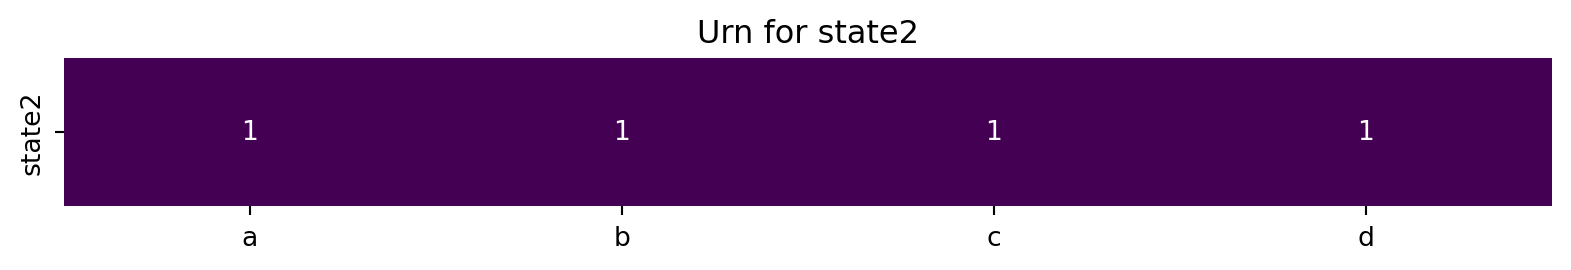

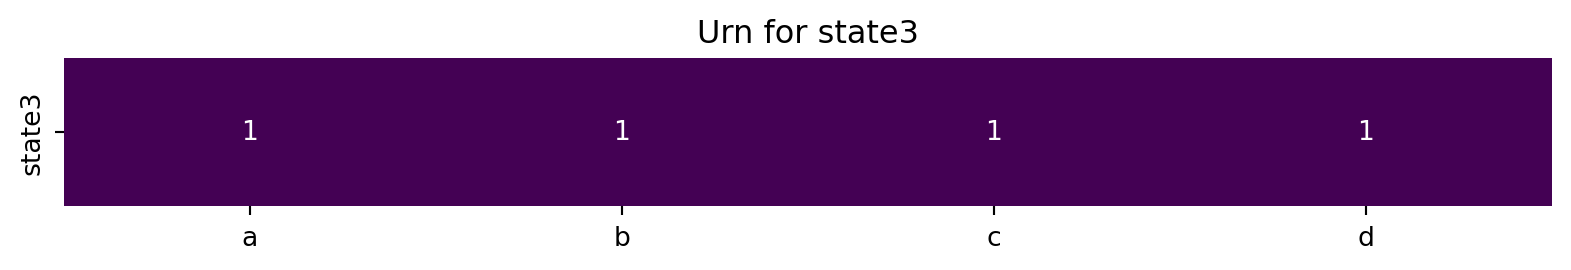

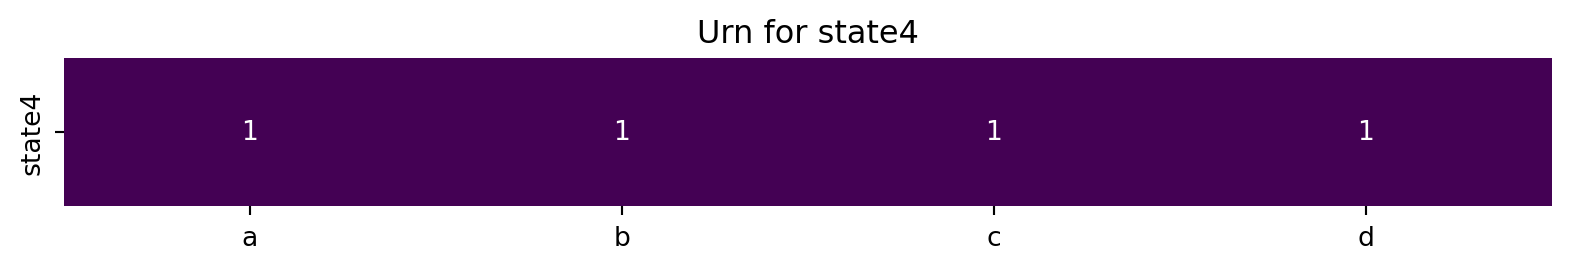

In [11]:
class MultiUrn:
    def __init__(self, row_names, col_names, init='ones'):
        self.row_names = row_names
        self.col_names = col_names
        self.num_rows = len(row_names)
        self.num_cols = len(col_names)
        
        if init == 'ones':
            self.weights = np.ones((self.num_rows, self.num_cols))
        elif init == 'zeros':
            self.weights = np.zeros((self.num_rows, self.num_cols))
        elif init == 'random':
            self.weights = np.random.rand(self.num_rows, self.num_cols)
        else:
            raise ValueError("Initialization parameter must be 'ones', 'zeros', or 'random'.")
    
    def _convert_to_numeric(self, row_name, col_name):
        try:
            row_idx = self.row_names.index(row_name)
            col_idx = self.col_names.index(col_name)
            return row_idx, col_idx
        except ValueError:
            raise ValueError("Invalid row or column name.")
    
    def get_weight(self, row_name, col_name):
        row_idx, col_idx = self._convert_to_numeric(row_name, col_name)
        return self.weights[row_idx, col_idx]
    
    def set_weight(self, row_name, col_name, value):
        row_idx, col_idx = self._convert_to_numeric(row_name, col_name)
        self.weights[row_idx, col_idx] = value
    
    def add_weights(self, other_urn):
        if self.weights.shape != other_urn.weights.shape:
            raise ValueError("Urns must have the same dimensions to add weights.")
        return Urn(self.row_names, self.col_names, init=None, weights=self.weights + other_urn.weights)
    
    def get_conditional_probabilities(self):
        row_sums = self.weights.sum(axis=1, keepdims=True)
        conditional_probs = self.weights / row_sums
        return conditional_probs
    
    def get_conditional_probability(self, row_name, col_name):
        row_idx, col_idx = self._convert_to_numeric(row_name, col_name)
        row_sum = self.weights[row_idx, :].sum()
        conditional_prob = self.weights[row_idx, col_idx] / row_sum
        return conditional_prob

    def choose_option(self, row_name):
        row_idx = self.row_names.index(row_name)
        row_weights = self.weights[row_idx, :]
        col_idx = np.random.choice(self.num_cols, p=row_weights/row_weights.sum())
        return self.col_names[col_idx]
    
    def update_weights(self, row_name, col_name, reward):
        row_idx, col_idx = self._convert_to_numeric(row_name, col_name)
        self.weights[row_idx, col_idx] += reward

    def plot_heatmap(self):
        for idx, row_name in enumerate(self.row_names):
            plt.figure(figsize=(10, 1))
            sns.heatmap(self.weights[idx, :].reshape(1, -1), annot=True, cmap="viridis", cbar=False, xticklabels=self.col_names, yticklabels=[row_name])
            plt.title(f"Urn for {row_name}")
            plt.show()
            

    def calculate_expected_reward(self, receiver_urn):
        result = 0.0
        sender_probs = self.get_conditional_probabilities()
        receiver_probs = receiver_urn.get_conditional_probabilities()
        
        for sender_state in self.row_names:
            for sender_signal in self.col_names:
                p_sender = self.get_conditional_probability(sender_state, sender_signal)
                for receiver_signal in receiver_urn.row_names:
                    for receiver_state in receiver_urn.col_names:
                        p_receiver = receiver_urn.get_conditional_probability(receiver_signal, receiver_state)
                        if receiver_signal == sender_signal:
                            result += p_sender * p_receiver
        return result
    
    def add_expected_reward(self, receiver_urn):
        expected_reward = self.calculate_expected_reward(receiver_urn)
        for row_name in self.row_names:
            for col_name in self.col_names:
                self.update_weights(row_name, col_name, expected_reward)    

    def __str__(self):
        return str(self.weights)

# Example usage
row_names = ['state0', 'state1', 'state2', 'state3', 'state4']
col_names = ['a', 'b', 'c', 'd']

urn = MultiUrn(row_names, col_names, init='ones')

print("Initial weights:")
print(urn)

weight_0_a = urn.get_weight('state0', 'a')
print(f"Weight for state0 and signal 'a': {weight_0_a}")

urn.set_weight('state0', 'a', 2.0)
print("Weights after setting weight for state0 and signal 'a' to 0.5:")
print(urn)

conditional_probs = urn.get_conditional_probabilities()
print("Conditional probabilities:")
print(conditional_probs)

state = 'state0'
signal = 'a'
conditional_prob = urn.get_conditional_probability(state, signal)
print(f"Conditional probability of signal {signal} given {state}: {conditional_prob}")

state = 'state1'
signal = 'a'
conditional_prob = urn.get_conditional_probability(state, signal)
print(f"Conditional probability of signal {signal} given {state}: {conditional_prob}")

chosen_signal = urn.choose_option('state0')
print(f"Chosen signal for state0: {chosen_signal}")

urn.update_weights('state0', 'a', 1.0)
print("Weights after updating weight for state0 and signal 'a' with a reward of 0.1:")
print(urn)



# Plot heatmaps
urn.plot_heatmap()

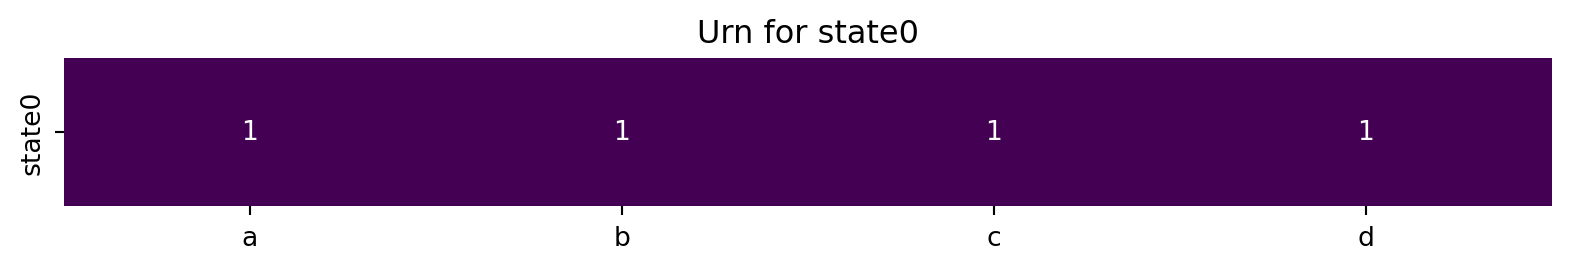

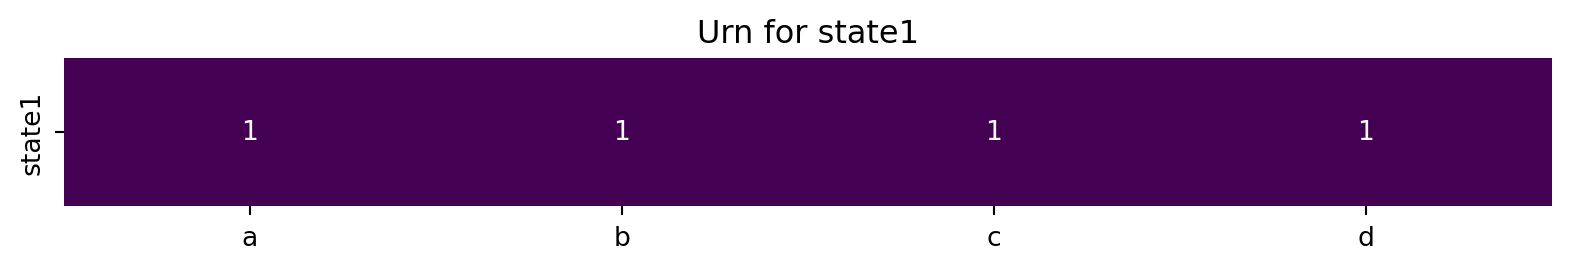

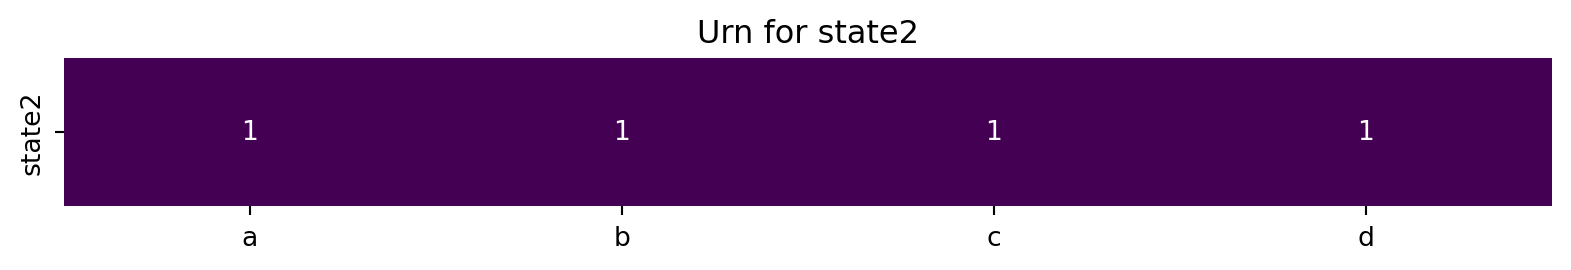

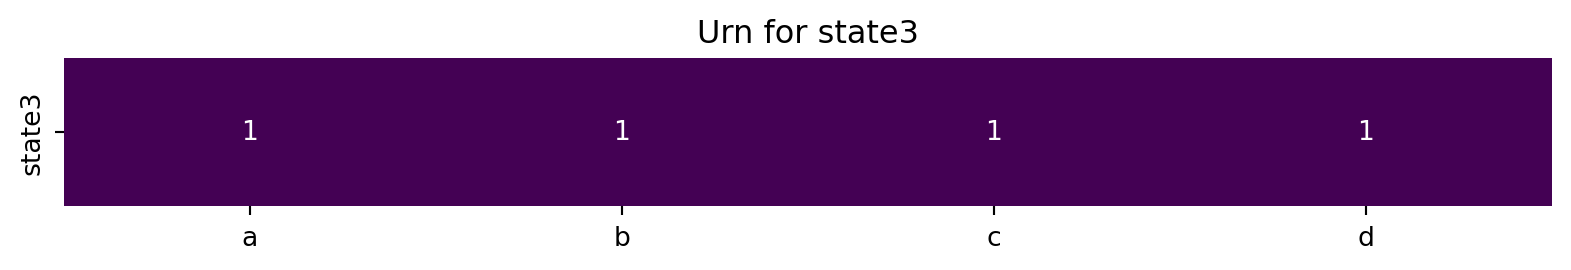

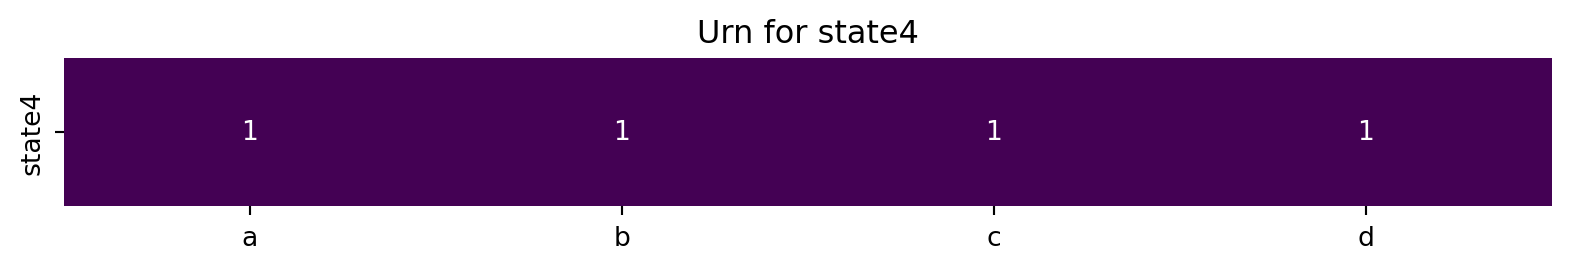

In [12]:
s_row_names = ['state0', 'state1', 'state2', 'state3', 'state4']
s_col_names = ['a', 'b', 'c', 'd']
s_urn = MultiUrn(s_row_names, s_col_names, init='ones')
s_urn.plot_heatmap()

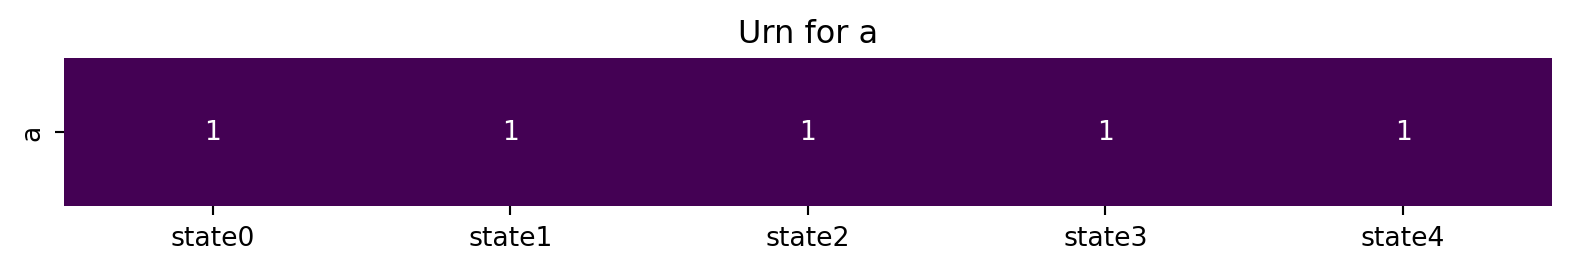

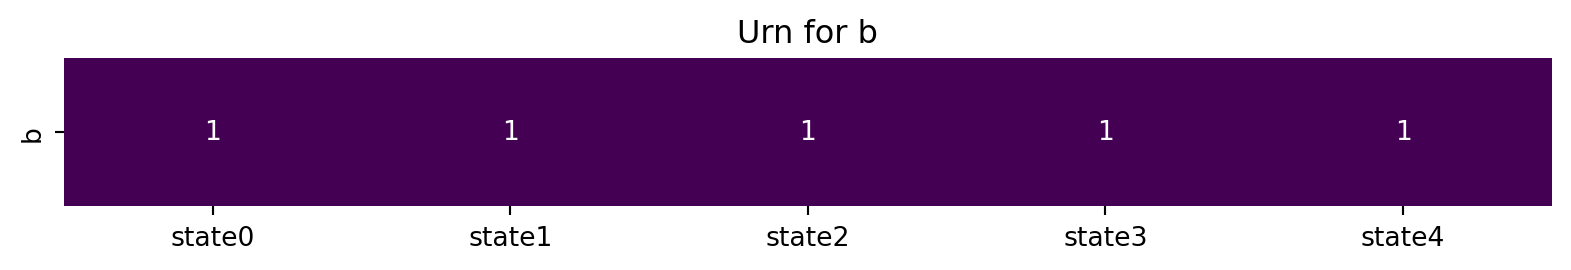

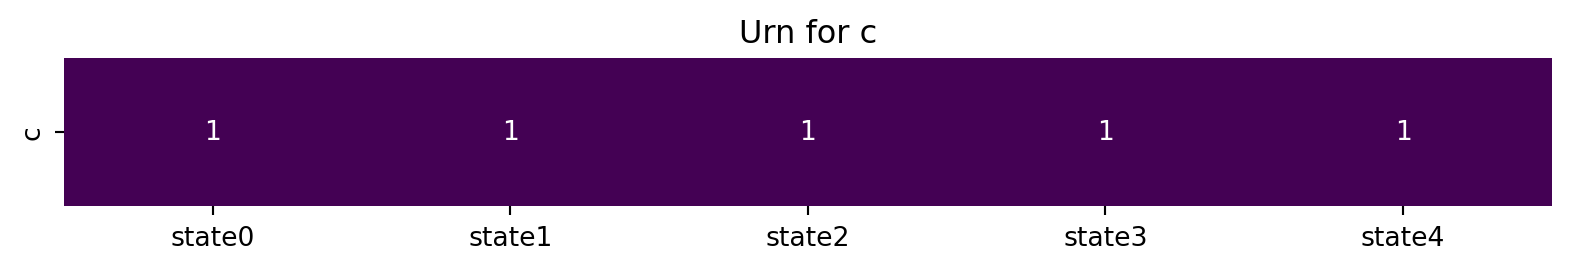

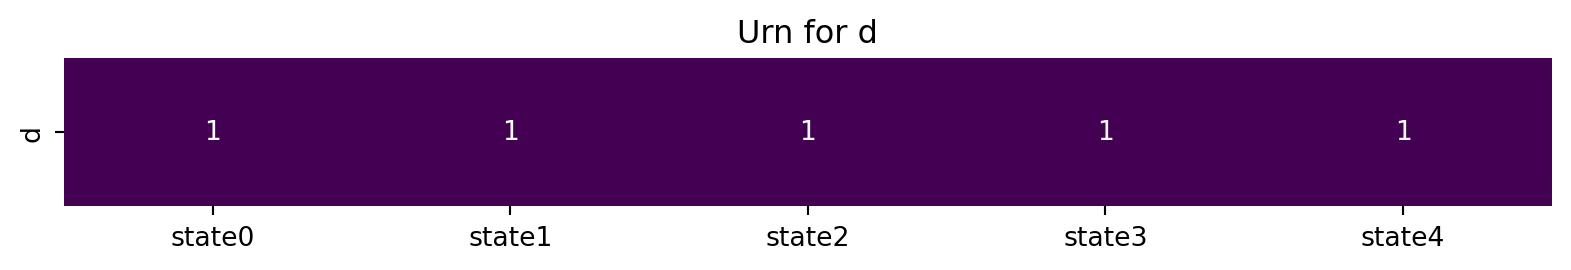

In [13]:
r_row_names = ['a', 'b', 'c', 'd']
r_col_names = ['state0', 'state1', 'state2', 'state3', 'state4']
r_urn = MultiUrn(r_row_names, r_col_names, init='ones')
r_urn.plot_heatmap()

Expected reward: 0.007999999999999985
Sender Urn weights after adding expected reward:
[[6. 6. 6. 6.]
 [6. 6. 6. 6.]
 [6. 6. 6. 6.]
 [6. 6. 6. 6.]
 [6. 6. 6. 6.]]


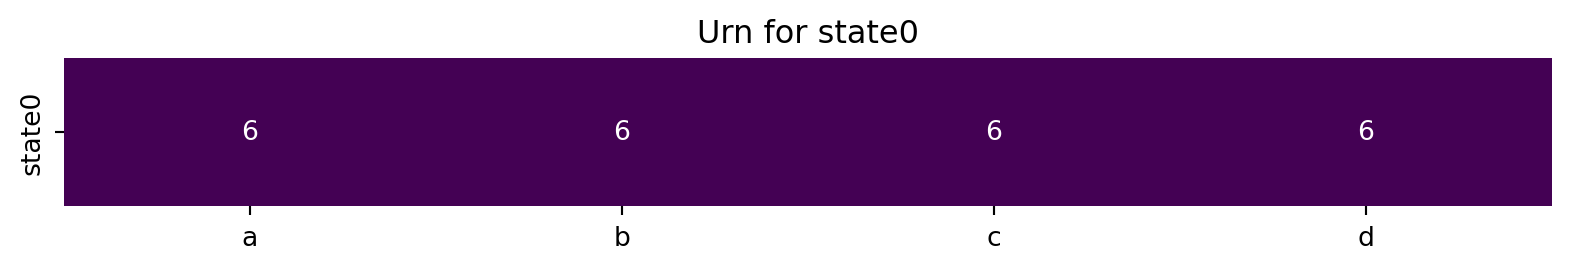

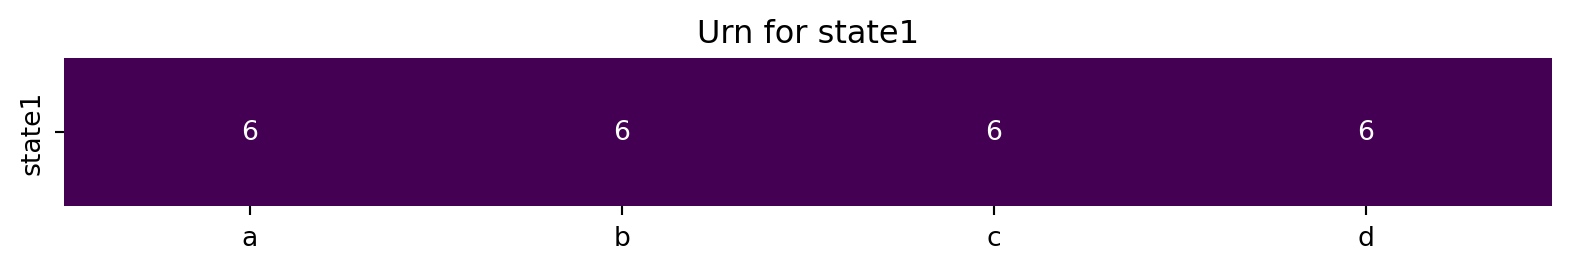

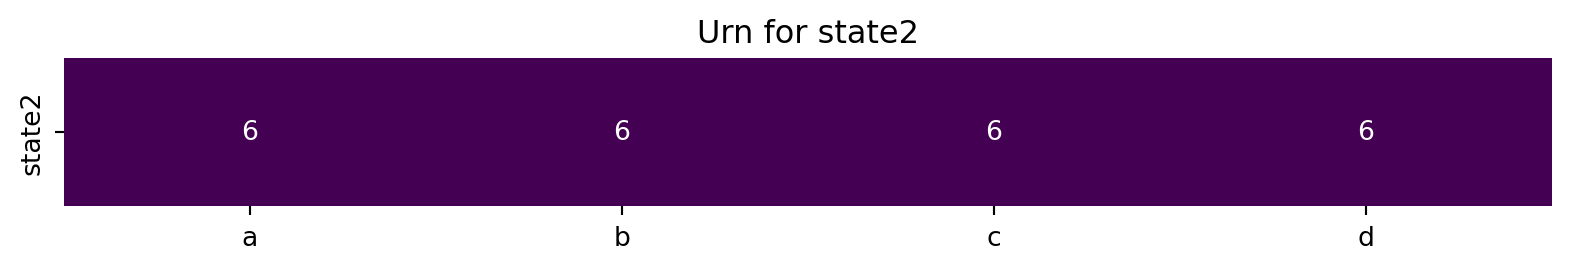

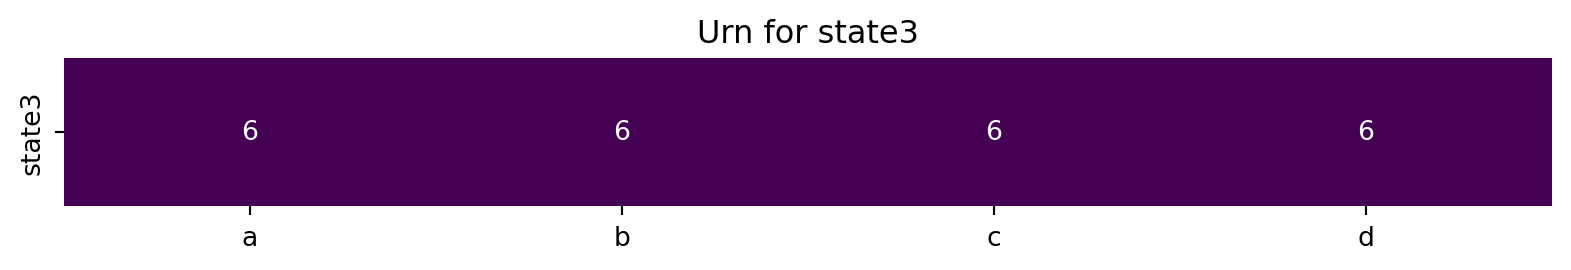

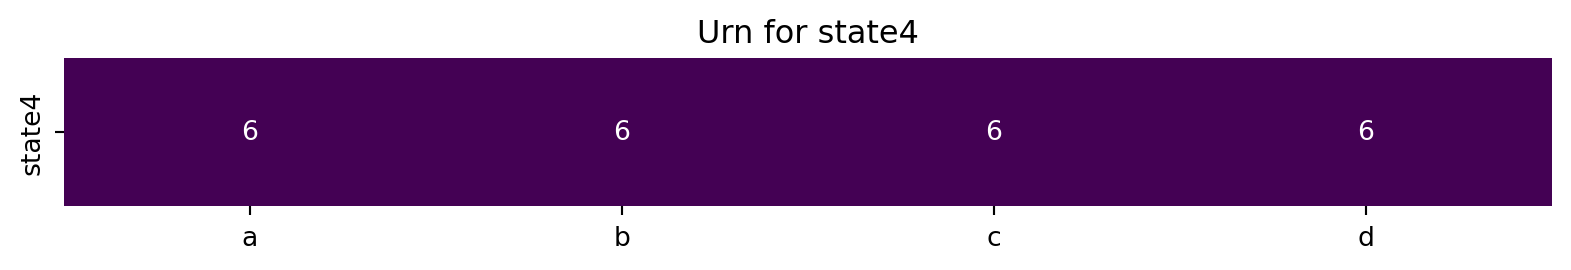

In [14]:
expected_reward = s_urn.calculate_expected_reward(r_urn)/(s_urn.num_rows*r_urn.num_cols*s_urn.num_rows*r_urn.num_cols)
print(f"Expected reward: {expected_reward}")

s_urn.add_expected_reward(r_urn)
print("Sender Urn weights after adding expected reward:")
print(s_urn)
s_urn.plot_heatmap()